In [10]:
import networkx as nx
import sys
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


from karateclub import Graph2Vec, FeatherGraph
from sklearn.decomposition import PCA

In [8]:
!pip install scikit-learn

In [2]:
path = "../data/hashtags/vertices"
hashtag_args = [f[:-5] for f in os.listdir(path) if f.endswith('.json')]


In [3]:
graphs = []
names = []
for hashtag in hashtag_args:
    names.append(hashtag)
    with open(f'C:/Users/madsh/OneDrive/Skrivebord/thesis/data/hashtags/edges/{hashtag}_edges.txt', 'r') as f:
        edges = f.readlines()
        
    users = []
    for edge in edges:
        u, v = edge.strip().split(',')
        if 'None' in v:
            continue
        u_user = u.split('/')[-3]
        v_user = v.split('/')[-3]
        users.append((u_user, v_user))
        # if (v_user, u_user) not in users:
        #     users.append((v_user, u_user))

    all_users = set([user for edge in users for user in edge])
    user_to_id = {user: i for i, user in enumerate(all_users)}

    users = [(user_to_id[src], user_to_id[dst]) for src, dst in users]

    G = nx.Graph()
    G.add_edges_from(users)
    G = nx.DiGraph(G)

    graphs.append(G)

    # with open(f'C:/Users/madsh/OneDrive/Skrivebord/thesis/data/hashtags/edges/{hashtag}_graph2vec_edges.txt', 'w') as out_file:
    #     for src, dst in users:
    #         out_file.write(f"{src},{dst}\n")
    # break


In [4]:
# Create a list of graphs (for example, using NetworkX)
# G1 = nx.fast_gnp_random_graph(100, 0.05)
# G2 = nx.fast_gnp_random_graph(100,0.05)
# G3 = nx.fast_gnp_random_graph(100, 0.1)
# G4 = nx.fast_gnp_random_graph(100, 0.15)
# G5 = nx.barabasi_albert_graph(100, 5)
# G6 = nx.barabasi_albert_graph(100, 10)
# G7 = nx.erdos_renyi_graph(100, 0.1)
# G8 = nx.watts_strogatz_graph(100, 5, 0.1)
# G9 = nx.watts_strogatz_graph(100, 10, 0.1)
# G10 = nx.watts_strogatz_graph(100, 5, 0.5)
# for hej in [G1, G2, G3, G4, G5, G6, G7, G8, G9, G10]:
#     graphs.append(hej)

# for hej in ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']:
#     names.append(hej)
model = FeatherGraph()

model.fit(graphs)

embeddings = model.get_embedding()

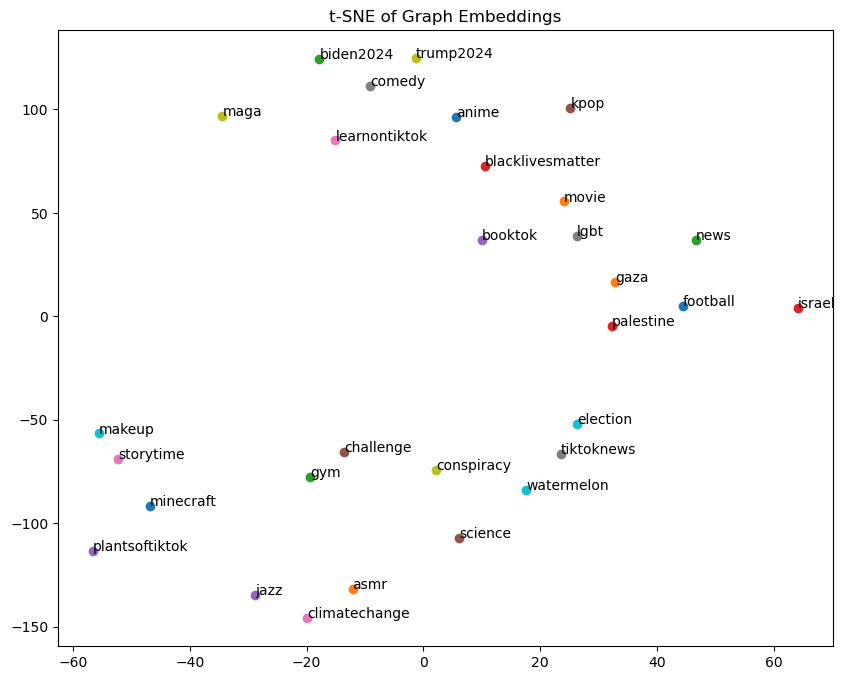

In [7]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)

embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))


for i in range(len(embeddings_2d)):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1], label=f'{names[i]}_graph')

plt.title('t-SNE of Graph Embeddings')

#add node labels
for i, txt in enumerate(names):
    plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

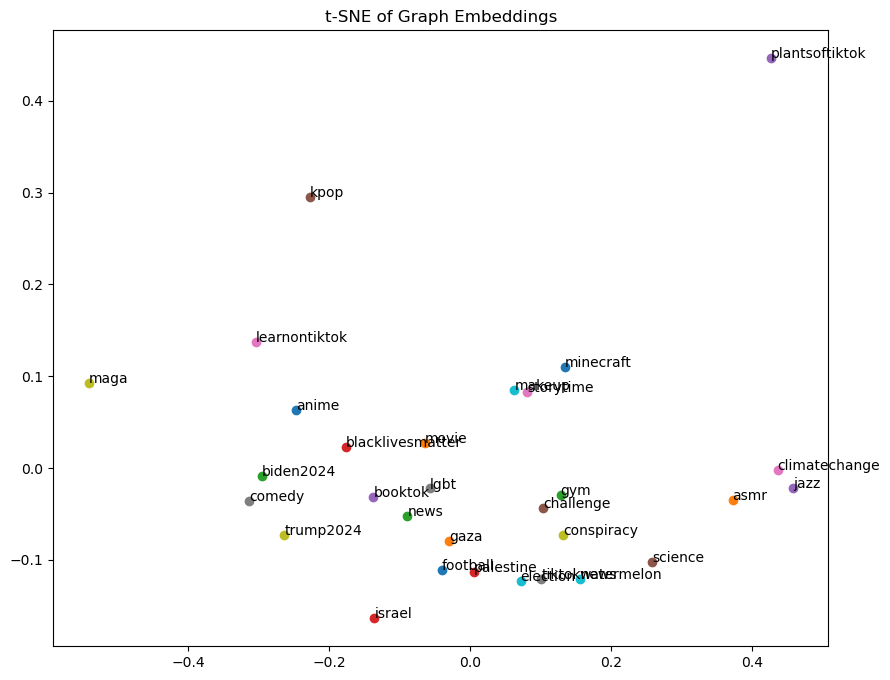

In [12]:
pca = PCA()
pca_results = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))



for i in range(len(pca_results)):
    plt.scatter(pca_results[i, 0], pca_results[i, 1], label=f'{names[i]}_graph')

plt.title('t-SNE of Graph Embeddings')

#add node labels
for i, txt in enumerate(names):
    plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]))

In [14]:
embeddings.shape

(30, 500)